In [11]:
# conda activate sfmr
import __init__ as f
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f.prepare_sfmr

<function __init__.prepare_sfmr(sfmr_file, track_df, acq_time)>

In [3]:
# SFMR
p_sfmr  = '/home/arthur/data/cyclobs/sfmr/noaa_aoml_hrd/2019/dorian/AFRC_SFMR20190830U3.nc'
ds_sfmr = xr.open_dataset(p_sfmr)
print('Time interval: ', ds_sfmr.attrs['TimeInterval'])

Time interval:  22:56:32-04:40:27


In [5]:
# SCAT or RAD
p_sct  = '/home/arthur/data/scatterometer/KNMI/product_JF_rotated_filtered/POLAR/2019/AL052019/POL_ascat_20190830_004500_metopa_66735_srv_o_125_ovw.nc'
ds_sct = xr.open_dataset(p_sct)
P_SCT  = '/home/arthur/data/scatterometer/KNMI/product_JF/' + ds_sct.data_file.item()
DS_SCT = xr.open_dataset(P_SCT)

In [6]:
track_df = pd.DataFrame(
    data={
        'datetime': DS_SCT.track_time,
        'lon':      DS_SCT.__track_lon,
        'lat':      DS_SCT.__track_lat,
    }
)

# acq_time = pd.to_datetime(ds_sct.acquisition_time.item())
acq_time = ds_sct.acquisition_time.values
acq_time = pd.to_datetime(acq_time.astype('datetime64[s]')) # round to nearest second and convert to datetime object

In [7]:
sfmr_df  = f.prepare_sfmr(p_sfmr, track_df, acq_time)

INFO:coloc_config.py:/home/arthur/data/cyclobs/sfmr/noaa_aoml_hrd/2019/dorian/AFRC_SFMR20190830U3.nc
INFO:coloc_config.py:timing sfmr_resample : 0.0s. mem: -0.4Mb
INFO:coloc_config.py:timing spatial_downsample : 3.2s. mem: +43.0Mb
INFO:coloc_config.py:timing sfmr_translate : 0.4s. mem: +1.0Mb


<AxesSubplot:xlabel='time'>

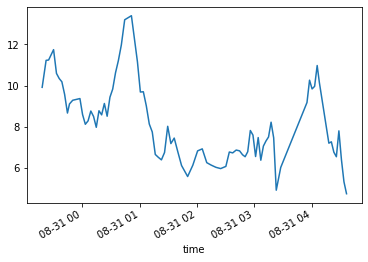

In [8]:
sfmr_df.SWS.plot()

In [9]:
sfmr_df

,SWS,LON,LAT,RALT,RANG,PANG,ATEMP,SST,SALN,SRR,FWS,FDIR
time,,,,,,,,,,,,
2019-08-30 23:13:26,NaN,-80.049622,25.432395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-30 23:17:51,9.911955,-79.805364,25.515227,5755.680455,0.395718,8.773736,-5.082273,30.065000,36.0,0.337727,-999.9,-999.9
2019-08-30 23:21:58,11.222692,-79.565048,25.604327,6668.142308,0.574760,8.181740,-9.394087,29.908173,36.0,0.750433,-999.9,-999.9
2019-08-30 23:24:37,11.239516,-79.404194,25.663065,7113.509677,0.082871,8.042790,-11.747581,29.954839,36.0,0.435645,-999.9,-999.9
2019-08-30 23:29:48,11.742303,-79.064000,25.787636,7506.378788,0.056867,4.460612,-14.573636,29.415758,36.0,1.028364,-999.9,-999.9
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31 04:28:41,7.797914,-86.581583,30.007914,4564.749640,0.013698,1.401309,2.500000,29.957914,36.0,0.000000,-999.9,-999.9
2019-08-31 04:31:21,6.399420,-86.832319,30.052174,4561.036232,0.002775,1.388616,2.349638,29.950000,36.0,0.000000,-999.9,-999.9
2019-08-31 04:33:59,5.324714,-87.081571,30.096714,4506.135714,-0.195021,0.683200,2.383929,29.933929,36.0,0.006429,-999.9,-999.9


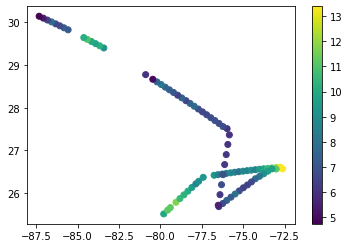

In [17]:
plt.scatter(sfmr_df['LON'], sfmr_df['LAT'], c=sfmr_df['SWS']);plt.colorbar()